In [239]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

plt.style.use('ggplot')

pd.options.display.max_columns = 200
pd.options.display.max_rows = 200

df = pd.read_csv('Data/campeonatos_futebol_atualizacao.csv')

df.head()

# df.columns


,Chutes a gol 1,Chutes a gol 2,Impedimentos 1,Impedimentos 2,Escanteios 1,Escanteios 2,Chutes fora 1,Chutes fora 2,Faltas 1,Faltas 2,Cartões amarelos 1,Cartões amarelos 2,Cartões vermelhos 1,Cartões vermelhos 2,Cruzamentos 1,Cruzamentos 2,Laterais 1,Laterais 2,Chutes bloqueados 1,Chutes bloqueados 2,Contra-ataques 1,Contra-ataques 2,Gols 1,Gols 2,Tiro de meta 1,Tiro de meta 2,Tratamentos 1,Tratamentos 2,Substituições 1,Substituições 2,Tiros-livres 1,Tiros-livres 2,Defesas difíceis 1,Defesas difíceis 2,Posse 1(%),Posse 2(%),Time 1,Time 2,Position 1,Position 2
0,8.0,0.0,6.0,3.0,7.0,1.0,6.0,1.0,8.0,14.0,0.0,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.0,NaN,NaN,NaN,NaN,3.0,3.0,NaN,NaN,NaN,NaN,77.0,23.0,Glasgow Rangers,Livingston,4-3-3,4-3-3
1,0.0,2.0,0.0,2.0,0.0,4.0,3.0,4.0,19.0,14.0,4.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,2.0,3.0,NaN,NaN,NaN,NaN,44.0,56.0,Ross County,St.Johnstone,3-5-2,3-5-2
2,4.0,5.0,1.0,5.0,8.0,11.0,2.0,5.0,13.0,14.0,2.0,2.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,3.0,3.0,NaN,NaN,NaN,NaN,47.0,53.0,Dundee FC,St. Mirren,4-3-3,3-4-1-2
3,4.0,7.0,8.0,1.0,6.0,5.0,4.0,7.0,4.0,11.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,2.0,3.0,NaN,NaN,NaN,NaN,27.0,73.0,Hearts,Celtic,3-4-3,4-2-3-1
4,3.0,1.0,1.0,3.0,5.0,4.0,2.0,2.0,12.0,17.0,1.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,NaN,NaN,NaN,NaN,3.0,3.0,NaN,NaN,NaN,NaN,58.0,42.0,Aberdeen,Dundee U.,4-4-2,3-5-1-1


Porcentagem de NaN por colunas:

Esse código nos possibilita visualizar as porcentagens de valores nulos de cada coluna. 

Além disso, também, são printados na tela os tipos dos dados correspondentes de cada coluna. Essa informação é essencial para entendermos a tipagem dos dados com os quais estamos lidando.


In [240]:
def pegaPorcentagemNulaTabelas(tabela):
  return (tabela.isnull().sum()/len(tabela)*100).sort_values(ascending=False)

tabelaPorcentagem = pegaPorcentagemNulaTabelas(df)

print(tabelaPorcentagem)

print(df.dtypes)
print(df.shape)

Tratamentos 2          81.891326
Tratamentos 1          81.891326
Defesas difíceis 2     77.644682
Defesas difíceis 1     77.644682
Tiros-livres 1         77.464281
Tiros-livres 2         77.464281
Contra-ataques 2       77.402944
Contra-ataques 1       77.402944
Chutes bloqueados 1    68.094242
Chutes bloqueados 2    68.094242
Cruzamentos 1          67.473661
Cruzamentos 2          67.473661
Substituições 1        66.012412
Substituições 2        66.012412
Tiro de meta 1         56.649589
Tiro de meta 2         56.649589
Laterais 1             45.277096
Laterais 2             45.277096
Impedimentos 1         10.008659
Impedimentos 2         10.008659
Posse 1(%)              8.478857
Posse 2(%)              8.478857
Escanteios 1            8.399480
Escanteios 2            8.399480
Chutes fora 2           8.385048
Chutes fora 1           8.385048
Faltas 1                8.377832
Faltas 2                8.377832
Position 2              5.881080
Position 1              5.780055
Chutes a g

Além disso, verificamos que há 12 linhas duplicadas no datraframe, o que implica que devemos retirar essa linhas, já que, valores repitidos não agregam valor à nossa análise 


In [241]:
## Verifica quantidade de linhas duplicadas
print(df.duplicated().sum())
## Retorna um novo Dataframe com apenas as linhas não duplicadas 
df = df.loc[~df.duplicated()].drop_duplicates().reset_index(drop=True)



12


Considerando que as variáveis Gols 1 e 2 são as mais importantes para definir o resultado de um jogo, vamos estudar a correlação entre Gols 1 e 2 e as variáveis com mais de 10% de NaN para a partir disso quais iremos excluir. A coorelação pode ser vista tanto na atbela quanto no gráfico abaixo.

Correlação com Gols 1:


Contra-ataques 1       0.150537
Defesas difíceis 2     0.107244
Impedimentos 1         0.042473
Tratamentos 1          0.040736
Substituições 1        0.019510
Substituições 2        0.000818
Chutes bloqueados 1   -0.007881
Impedimentos 2        -0.034586
Cruzamentos 2         -0.038870
Chutes bloqueados 2   -0.070105
Tiro de meta 2        -0.070231
Laterais 2            -0.072315
Tiro de meta 1        -0.081708
Defesas difíceis 1    -0.081892
Tratamentos 2         -0.083453
Tiros-livres 2        -0.093379
Cruzamentos 1         -0.095993
Tiros-livres 1        -0.097501
Laterais 1            -0.121961
Contra-ataques 2      -0.171393
Name: Gols 1, dtype: float64


Correlação com Gols 2:


Contra-ataques 2       0.207576
Defesas difíceis 1     0.113926
Chutes bloqueados 2    0.056798
Cruzamentos 1          0.038224
Substituições 2        0.031885
Tratamentos 2          0.029815
Impedimentos 2         0.028983
Substituições 1        0.012608
Chutes bloqueados 1   -0.017845
Laterais 1            -0.019145
Tiros-livres 1        -0.028422
Tiro de meta 1        -0.035760
Impedimentos 1        -0.042700
Cruzamentos 2         -0.050135
Tiros-livres 2        -0.050792
Tratamentos 1         -0.051356
Tiro de meta 2        -0.053593
Laterais 2            -0.063758
Defesas difíceis 2    -0.075836
Contra-ataques 1      -0.131422
Name: Gols 2, dtype: float64

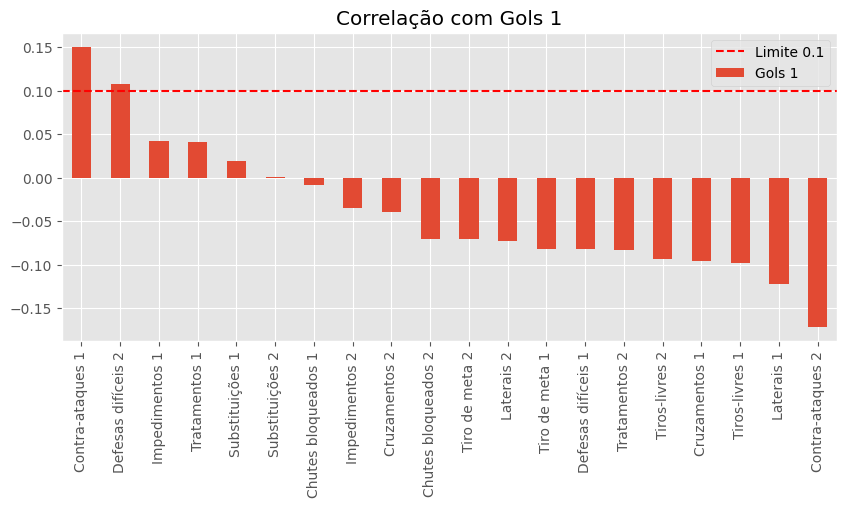

In [242]:
# Selecionar só as colunas com muitos NaNs
na_maiores_10 = df.columns[df.isnull().mean() > 0.1]

# Juntar com Gols 1 e Gols 2 para estudar correlação
colunas_para_estudo = list(na_maiores_10) + ['Gols 1', 'Gols 2']

# Criar uma cópia só com essas
estudo = df[colunas_para_estudo]

# Calcular correlação entre essas variáveis
correlacoes = estudo.corr(numeric_only=True)

# Visualizar a correlação com Gols 1 e Gols 2
cor_gols1 = correlacoes['Gols 1'].drop(['Gols 1', 'Gols 2'])
cor_gols2 = correlacoes['Gols 2'].drop(['Gols 1', 'Gols 2'])

# Mostrar ordenado
print("Correlação com Gols 1:")
display(cor_gols1.sort_values(ascending=False))

print("\nCorrelação com Gols 2:")
display(cor_gols2.sort_values(ascending=False))

cor_gols1.sort_values(ascending=False).plot(kind='bar', title='Correlação com Gols 1', figsize=(10,4))
plt.axhline(0.1, color='red', linestyle='--', label='Limite 0.1')
plt.legend()
plt.show()


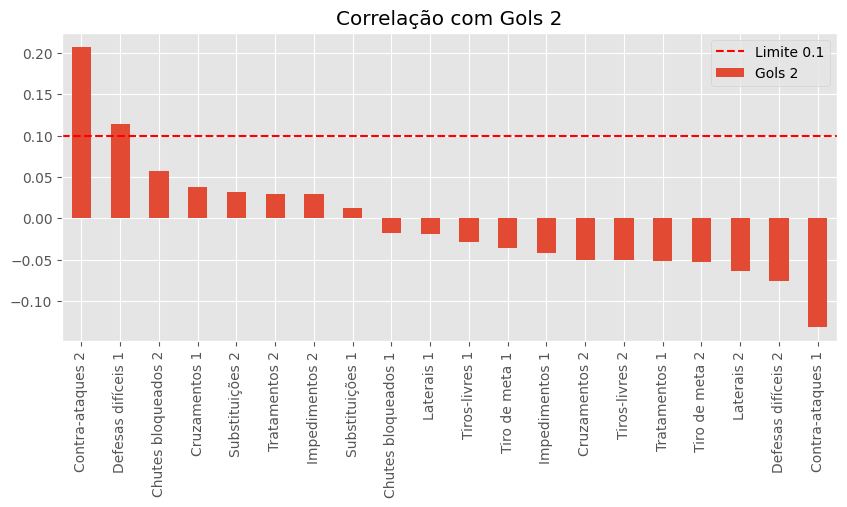

In [243]:
cor_gols2.sort_values(ascending=False).plot(kind='bar', title='Correlação com Gols 2', figsize=(10,4))
plt.axhline(0.1, color='red', linestyle='--', label='Limite 0.1')
plt.legend()
plt.show()

Baseado nas correlações apresentadas, algumas variáveis demonstram baixa relação com os gols marcados por cada time (Gols 1 e Gols 2), o que indica que elas podem ter pouca relevância na previsão de resultados. 

**O que os números significam?**  
Correlação próxima de 1 indica uma forte relação positiva (ex: quanto mais daquela variável, mais gols são marcados). Correlação próxima de -1 indica uma forte relação negativa (ex: quanto mais daquela variável, menos gols). Já valores próximos de 0 sugerem que não há relação clara.  
Na prática, em bases de dados reais (ou seja, com variações naturais, erros de entrada, valores ausentes — o chamado *ruído*), correlações acima de ±0.1 já podem indicar alguma influência, sendo este um valor de corte comumente utilizado em análises exploratórias para triagem de variáveis.

Com base nesse critério, e levando em conta que muitas dessas variáveis também possuem mais de 10% de valores ausentes (o que agrava a irrelevância), as seguintes variáveis foram selecionadas para descarte:

Laterais 1
Laterais 2
Tiros-livres 1
Tiros-livres 2
Tiro de meta 1
Tiro de meta 2
Substituições 1
Substituições 2
Cruzamentos 1
Cruzamentos 2
Tratamentos 1
Tratamentos 2
Chutes bloqueados 1
Chutes bloqueados 2
Impedimentos 1
Impedimentos 2

Essas variáveis possuem correlação inferior a ±0.1 com os gols dos respectivos times e podem ser eliminadas para reduzir a dimensionalidade do modelo. No entanto, vale destacar que uma variável pode ser mantida caso tenha justificativa contextual, por exemplo, se o conhecimento do domínio esportivo indicar uma possível influência indireta nos resultados.


In [244]:
colunas_para_dropar = [
    'Laterais 1', 'Laterais 2',
    'Tiros-livres 1', 'Tiros-livres 2',
    'Tiro de meta 1', 'Tiro de meta 2',
    'Substituições 1', 'Substituições 2',
    'Cruzamentos 1', 'Cruzamentos 2',
    'Tratamentos 1', 'Tratamentos 2',
    'Chutes bloqueados 1', 'Chutes bloqueados 2',
    'Impedimentos 1', 'Impedimentos 2'
]

# Confirma quais colunas realmente existem no DataFrame
colunas_existentes = [col for col in colunas_para_dropar if col in df.columns]

# Agora sim remove só as que existem
df = df.drop(columns=colunas_existentes)

df.head()


,Chutes a gol 1,Chutes a gol 2,Escanteios 1,Escanteios 2,Chutes fora 1,Chutes fora 2,Faltas 1,Faltas 2,Cartões amarelos 1,Cartões amarelos 2,Cartões vermelhos 1,Cartões vermelhos 2,Contra-ataques 1,Contra-ataques 2,Gols 1,Gols 2,Defesas difíceis 1,Defesas difíceis 2,Posse 1(%),Posse 2(%),Time 1,Time 2,Position 1,Position 2
0,8.0,0.0,7.0,1.0,6.0,1.0,8.0,14.0,0.0,5.0,0.0,0.0,NaN,NaN,3.0,0.0,NaN,NaN,77.0,23.0,Glasgow Rangers,Livingston,4-3-3,4-3-3
1,0.0,2.0,0.0,4.0,3.0,4.0,19.0,14.0,4.0,1.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,44.0,56.0,Ross County,St.Johnstone,3-5-2,3-5-2
2,4.0,5.0,8.0,11.0,2.0,5.0,13.0,14.0,2.0,2.0,1.0,0.0,NaN,NaN,2.0,2.0,NaN,NaN,47.0,53.0,Dundee FC,St. Mirren,4-3-3,3-4-1-2
3,4.0,7.0,6.0,5.0,4.0,7.0,4.0,11.0,0.0,0.0,0.0,0.0,NaN,NaN,2.0,1.0,NaN,NaN,27.0,73.0,Hearts,Celtic,3-4-3,4-2-3-1
4,3.0,1.0,5.0,4.0,2.0,2.0,12.0,17.0,1.0,3.0,0.0,0.0,NaN,NaN,2.0,0.0,NaN,NaN,58.0,42.0,Aberdeen,Dundee U.,4-4-2,3-5-1-1


In [245]:
df.shape

(27704, 24)

Na etapa de tratamento de dados faltantes, optamos pela imputação utilizando a mediana como estratégia principal. Embora existam diferentes métodos, como a substituição pela média, a mediana se destaca por sua robustez. Independentemente de a distribuição dos dados em uma variável ser simétrica ou assimétrica, a mediana tende a ser menos influenciada por valores extremos (outliers) e por possíveis desvios na distribuição. 

A imputação pela moda (categoria mais frequente) foi escolhida para substituir os valores faltantes nas colunas categóricas, como Time 1, Time 2, Position 1 e Position 2, pois assume que a categoria mais recorrente tem uma maior probabilidade de representar os dados ausentes e é onde a imputação de valores numéricos não seria adequada.

In [246]:
# Lista de colunas que não devem ser alteradas
colunas_excecao = ['Time 1', 'Time 2', 'Position 1', 'Position 2']

# Cria uma nova lista com todas as colunas numéricas do df
# Verifica se as colunas em col são numéricas com pd.api.types.is_numeric_dtypes(df[col])
# Retorna True se a coluna col for numérica e False se não for numérica
colunas_para_imputar = [col for col in df.columns if col not in colunas_excecao and pd.api.types.is_numeric_dtype(df[col])]

# Imputa os NaNs pela mediana de cada coluna

def preecheTabelaComMediana():
    for col in colunas_para_imputar:
        mediana = df[col].median()           # Calcula a mediana da coluna 
        df[col] = df[col].fillna(mediana)    # Susbtitui os valores NaN pela mediana 


def preecheTabelaComMedianaPorcentagem(porcentagem):

  for coluna in df:
    if(tabelaPorcentagem[coluna] < porcentagem and df.dtypes[coluna] == 'float64'):

      col_median=df[coluna].median()

      df[coluna]=df[coluna].fillna(col_median)

  return df 

# Preenchemos apenas a posição com moda pelo fato de sua coluna ser tipada como um string
def preencheTabelaComModa():
    modaP1, modaP2 = df['Position 1'].mode()[0],df['Position 2'].mode()[0]
    df['Position 1']=df['Position 1'].fillna(modaP1)
    df['Position 2']=df['Position 2'].fillna(modaP2)
    return df

preecheTabelaComMediana()
preencheTabelaComModa()

# Verifica se ainda existem NaNs

print(df.isnull().sum())


Chutes a gol 1         0
Chutes a gol 2         0
Escanteios 1           0
Escanteios 2           0
Chutes fora 1          0
Chutes fora 2          0
Faltas 1               0
Faltas 2               0
Cartões amarelos 1     0
Cartões amarelos 2     0
Cartões vermelhos 1    0
Cartões vermelhos 2    0
Contra-ataques 1       0
Contra-ataques 2       0
Gols 1                 0
Gols 2                 0
Defesas difíceis 1     0
Defesas difíceis 2     0
Posse 1(%)             0
Posse 2(%)             0
Time 1                 0
Time 2                 0
Position 1             0
Position 2             0
dtype: int64


Nesse código, conseguimos visualizar as posições que mais aparecem no Dataframe

Text(0, 0.5, 'Quantidade')

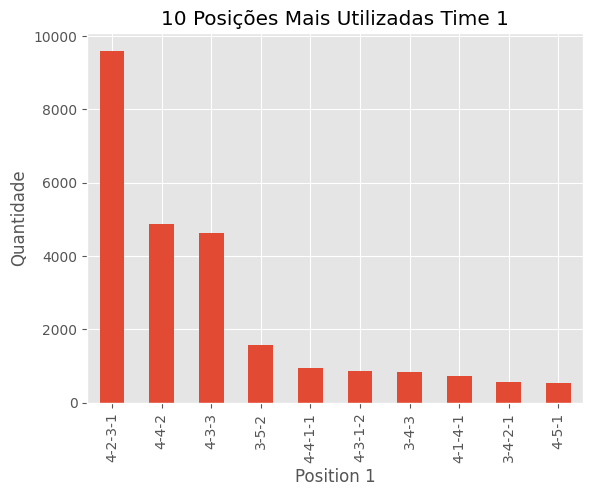

In [247]:
grafico = df['Position 1'].value_counts().head(10).plot(kind="bar", title="10 Posições Mais Utilizadas Time 1")
grafico.set_ylabel('Quantidade')

# print(df['Position 2'].value_counts().head(10).plot(kind="bar"))

<Axes: title={'center': 'Posse Time 1'}, ylabel='Frequency'>

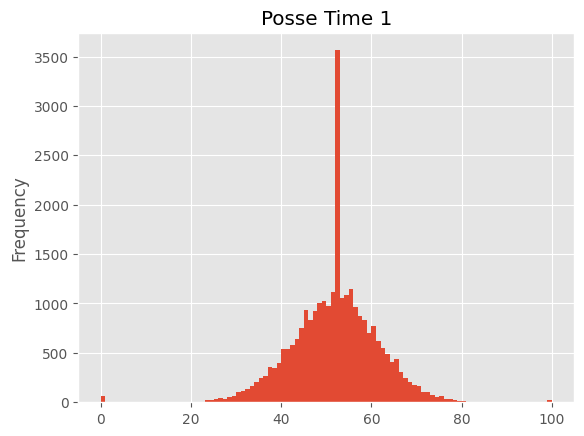

In [248]:
df['Posse 1(%)'].plot(kind='hist', title="Posse Time 1", bins=100)

<Axes: title={'center': 'Gols Time 1'}, ylabel='Frequency'>

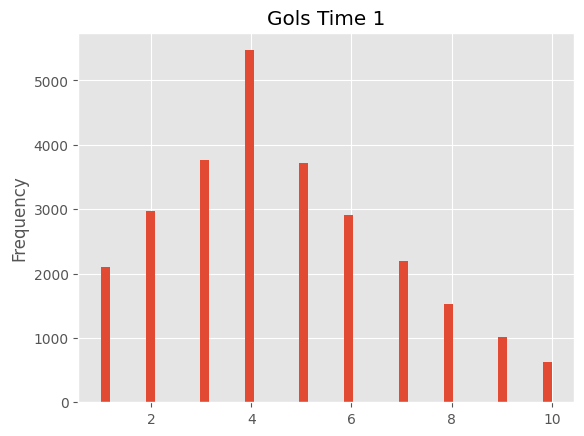

In [249]:
df['Chutes a gol 1'].plot(kind='hist', title="Gols Time 1", range=[1,10], bins=50)

ScatterPlot


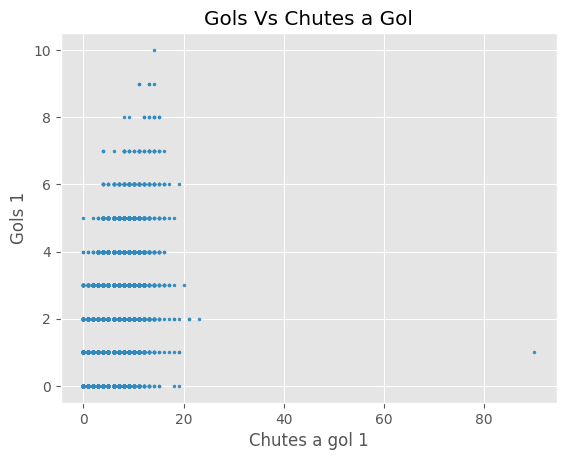

In [250]:
df.plot.scatter(x='Chutes a gol 1', y="Gols 1", title="Gols Vs Chutes a Gol", s=4)
plt.show()


/home/antoniopedro/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


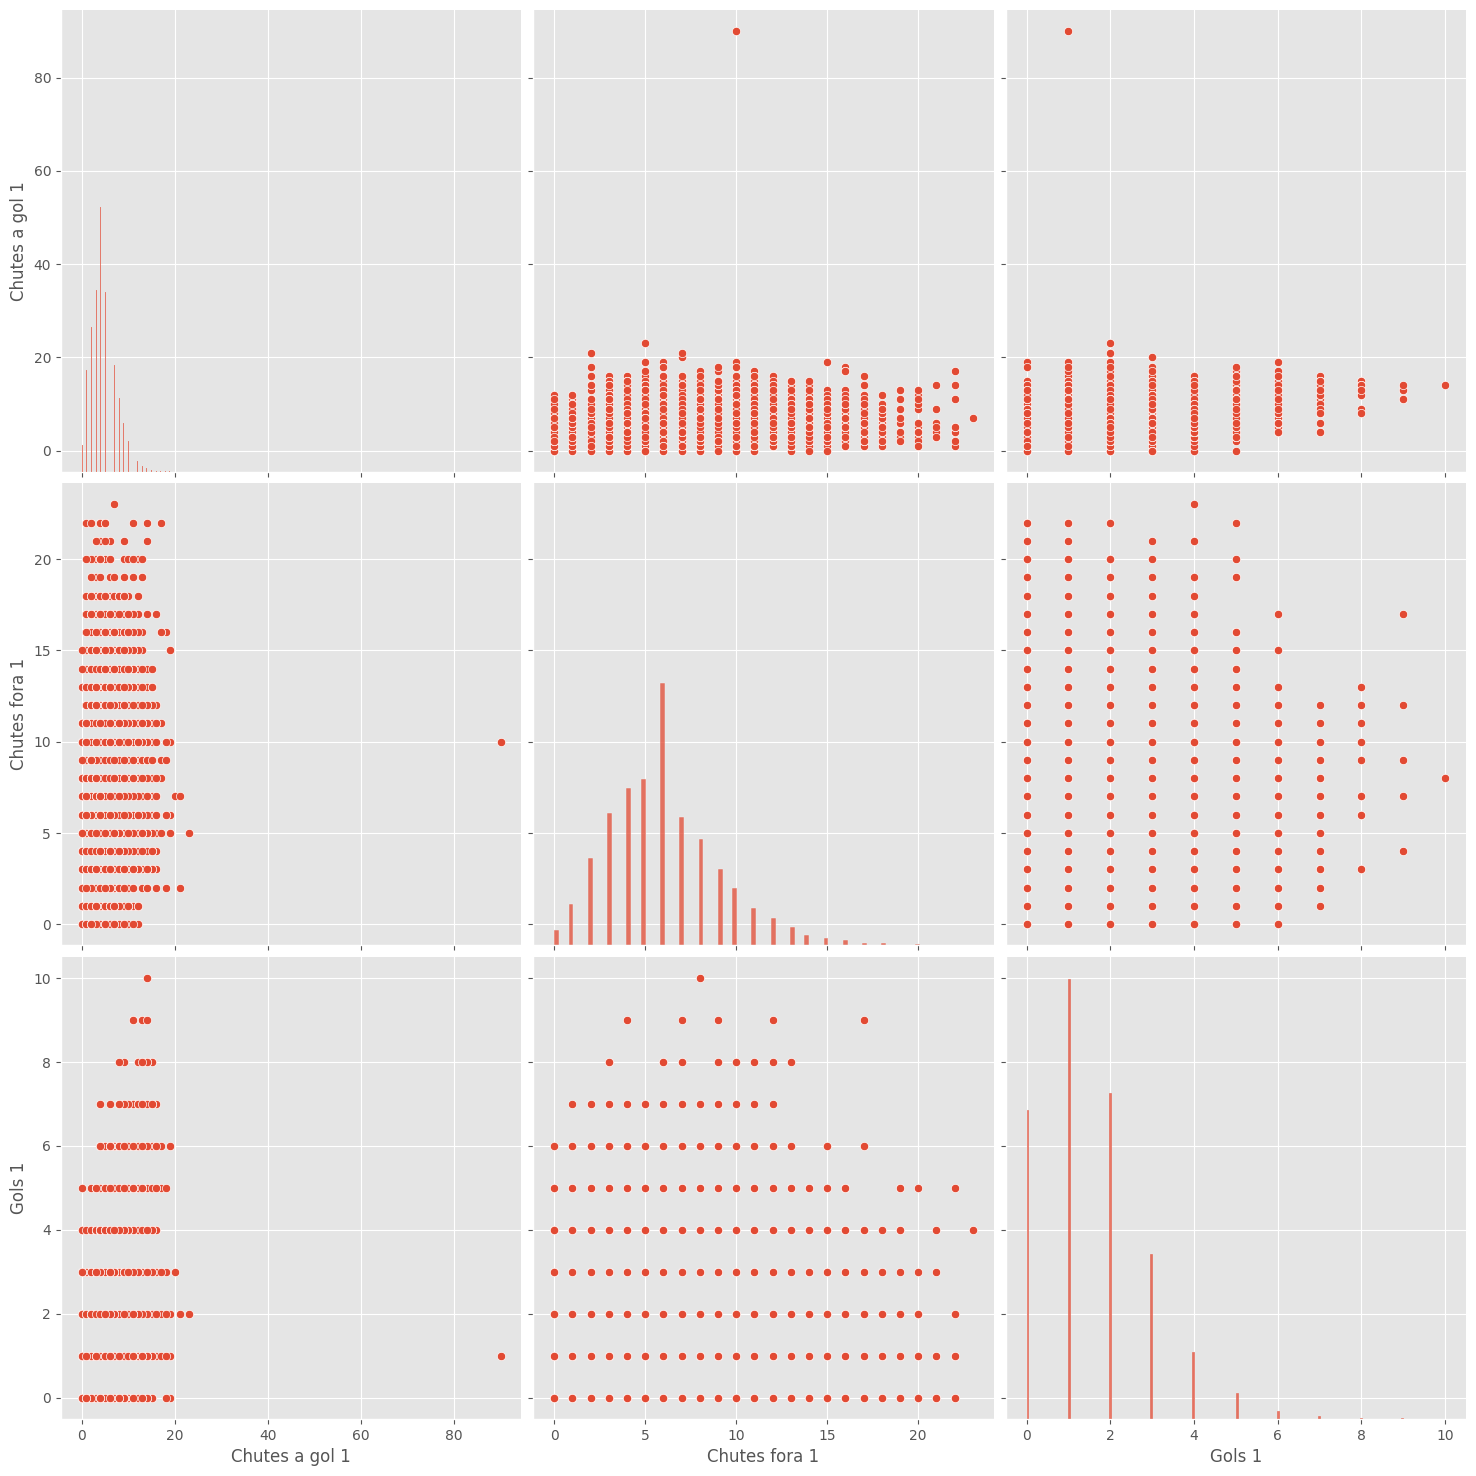

In [251]:
df.head()
sns.pairplot(df, vars=['Chutes a gol 1', 'Chutes fora 1', 'Gols 1'], size=5)

plt.show()

In [252]:
df.head()

,Chutes a gol 1,Chutes a gol 2,Escanteios 1,Escanteios 2,Chutes fora 1,Chutes fora 2,Faltas 1,Faltas 2,Cartões amarelos 1,Cartões amarelos 2,Cartões vermelhos 1,Cartões vermelhos 2,Contra-ataques 1,Contra-ataques 2,Gols 1,Gols 2,Defesas difíceis 1,Defesas difíceis 2,Posse 1(%),Posse 2(%),Time 1,Time 2,Position 1,Position 2
0,8.0,0.0,7.0,1.0,6.0,1.0,8.0,14.0,0.0,5.0,0.0,0.0,1.0,1.0,3.0,0.0,2.0,3.0,77.0,23.0,Glasgow Rangers,Livingston,4-3-3,4-3-3
1,0.0,2.0,0.0,4.0,3.0,4.0,19.0,14.0,4.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,3.0,44.0,56.0,Ross County,St.Johnstone,3-5-2,3-5-2
2,4.0,5.0,8.0,11.0,2.0,5.0,13.0,14.0,2.0,2.0,1.0,0.0,1.0,1.0,2.0,2.0,2.0,3.0,47.0,53.0,Dundee FC,St. Mirren,4-3-3,3-4-1-2
3,4.0,7.0,6.0,5.0,4.0,7.0,4.0,11.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0,2.0,3.0,27.0,73.0,Hearts,Celtic,3-4-3,4-2-3-1
4,3.0,1.0,5.0,4.0,2.0,2.0,12.0,17.0,1.0,3.0,0.0,0.0,1.0,1.0,2.0,0.0,2.0,3.0,58.0,42.0,Aberdeen,Dundee U.,4-4-2,3-5-1-1


In [253]:
result = df.groupby(['Chutes a gol 1', 'Gols 1']).size().reset_index(name='Frequência').sort_values('Gols 1', ascending=False).head(100)
print(result)
print(result.columns)

     Chutes a gol 1  Gols 1  Frequência
117            14.0    10.0           1
116            14.0     9.0           1
87             11.0     9.0           2
106            13.0     9.0           2
105            13.0     8.0           2
70              9.0     8.0           1
61              8.0     8.0           1
96             12.0     8.0           2
126            15.0     8.0           2
115            14.0     8.0           3
78             10.0     7.0           3
86             11.0     7.0           9
30              4.0     7.0           2
60              8.0     7.0           7
45              6.0     7.0           1
69              9.0     7.0           4
104            13.0     7.0           7
133            16.0     7.0           1
125            15.0     7.0           3
95             12.0     7.0           3
114            14.0     7.0           6
124            15.0     6.0           4
103            13.0     6.0          11
113            14.0     6.0           9


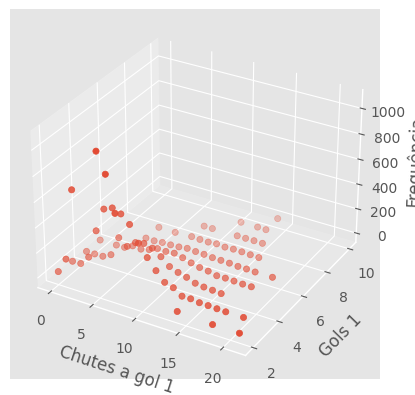

In [254]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = result['Chutes a gol 1']
y = result['Gols 1']
z = result['Frequência']

ax.set_xlabel('Chutes a gol 1')
ax.set_ylabel('Gols 1')
ax.set_zlabel('Frequência')

ax.scatter(x,y, z)

plt.show()

In [255]:
Q1 = df['Chutes a gol 1'].quantile(0.25)
Q3 = df['Chutes a gol 1'].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
threshold = 1.5
outliers = df[(df['Chutes a gol 1'] < Q1 - threshold * IQR) | (df['Chutes a gol 1'] > Q3 + threshold * IQR)]

print(outliers)

df = df.drop(outliers.index)



       Chutes a gol 1  Chutes a gol 2  Escanteios 1  Escanteios 2  \
8                15.0             0.0          11.0           3.0   
13               12.0             1.0          15.0           0.0   
72               12.0             6.0           8.0           6.0   
94               11.0             7.0          13.0           3.0   
97               11.0             6.0           6.0           9.0   
...               ...             ...           ...           ...   
27594            11.0             5.0           6.0           7.0   
27595            16.0             7.0           3.0           2.0   
27663            11.0            11.0           4.0           6.0   
27683            13.0             0.0           6.0           0.0   
27695            11.0             4.0          12.0           1.0   

       Chutes fora 1  Chutes fora 2  Faltas 1  Faltas 2  Cartões amarelos 1  \
8               11.0            3.0      11.0      12.0                 0.0   
13           